In [ ]:
!wget https://github.com/TheSSJ2612/Real-Time-Medical-Mask-Detection/releases/download/v0.1/Dataset.zip
!unzip Dataset.zip -d Dataset

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:10
🔁 Restarting kernel...


In [1]:
!conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0

Channels:
 - conda-forge
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=11.2
    - cudnn=8.1.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.1.31  |       hbcca054_0         154 KB  conda-forge
    certifi-2025.1.31          |     pyhd8ed1ab_0         159 KB  conda-forge
    cudatoolkit-11.2.2         |      hc23eb0c_13       630.6 MB  conda-forge
    cudnn-8.1.0.77             |       h90431f1_0       634.8 MB  conda-forge
    libgcc-14.2.0              |       h767d61c_2         828 KB  conda-forge
    libgcc-ng-14.2.0           |       h69a702a_2          52 KB  conda-forge
  

In [2]:
!pip install tensorflow==2.10.1 numpy==1.26.4 keras==2.10
!pip install retina-face opencv-python pyyaml h5py
!pip install tensorflow-io
!pip install -U albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 82.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 116.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 105.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 68.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
from PIL import Image
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import shutil

/usr/local/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutex6unlockEv']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextESt8functionIFN4absl12lts_202

In [4]:
# Ensure GPU Memory Growth
physical_devices = tf.config.experimental.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [5]:
# Define constants
resize = 224   # input image size
INIT_LR = 1e-4
EPOCHS = 50
BS = 64  # Smaller batch size to save memory

# Check if Dataset directory exists, if not use the extracted Dataset directory
if os.path.exists('/kaggle/input/facemask44k/Facemask-44k/dataset'):
    TRAIN_DIR = '/kaggle/input/facemask44k/Facemask-44k/dataset'
elif os.path.exists('/kaggle/working/Dataset'):
    TRAIN_DIR = '/kaggle/working/Dataset'
else:
    raise FileNotFoundError("Cannot find dataset directory")

print(f"Using dataset from: {TRAIN_DIR}")

Using dataset from: /kaggle/input/facemask44k/Facemask-44k/dataset


100%|██████████| 2/2 [01:28<00:00, 44.38s/it]
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


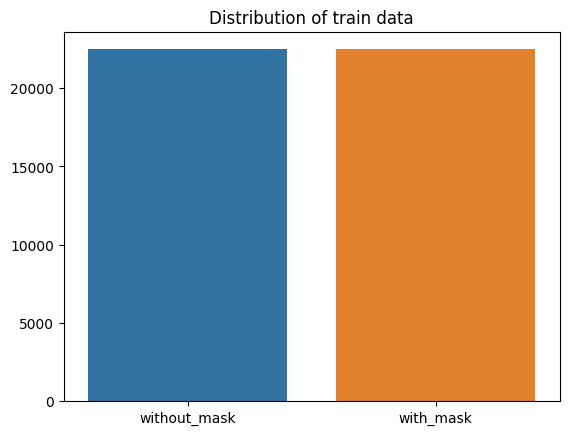

Total training examples: 44950


In [6]:
# Check the distribution of data
categories = []
class_count = []
train_exm = 0

# Loop through subdirectories in TRAIN_DIR to get the number of image files
for f in tqdm(os.listdir(TRAIN_DIR)):
    folder_path = os.path.join(TRAIN_DIR, f)
    if os.path.isdir(folder_path):  # Only get subdirectories, avoid files
        file_count = sum(1 for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file)))
        categories.append(f)
        class_count.append(file_count)
        train_exm += file_count

sns.barplot(x=categories, y=class_count).set_title("Distribution of train data")
plt.show()
print(f"Total training examples: {train_exm}")

In [7]:
# Create train/validation directory structure
def create_train_validation_dirs(train_dir, val_split=0.2):
    # Create necessary directories in the working directory
    base_dir = '/kaggle/working'
    train_split_dir = os.path.join(base_dir, 'train_split')
    val_split_dir = os.path.join(base_dir, 'val_split')
    
    # Remove if they already exist
    if os.path.exists(train_split_dir):
        shutil.rmtree(train_split_dir)
    if os.path.exists(val_split_dir):
        shutil.rmtree(val_split_dir)
    
    os.makedirs(train_split_dir)
    os.makedirs(val_split_dir)
    
    # Process each class directory
    for class_name in os.listdir(train_dir):
        class_dir = os.path.join(train_dir, class_name)
        if not os.path.isdir(class_dir):
            continue
        
        # Create corresponding directories in train/val
        os.makedirs(os.path.join(train_split_dir, class_name))
        os.makedirs(os.path.join(val_split_dir, class_name))
        
        # Get all files and shuffle them
        all_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
        np.random.shuffle(all_files)
        
        # Calculate split
        split_idx = int(len(all_files) * (1 - val_split))
        train_files = all_files[:split_idx]
        val_files = all_files[split_idx:]
        
        # Copy files
        for f in tqdm(train_files, desc=f"Copying {class_name} training files"):
            shutil.copy(
                os.path.join(class_dir, f),
                os.path.join(train_split_dir, class_name, f)
            )
        
        for f in tqdm(val_files, desc=f"Copying {class_name} validation files"):
            shutil.copy(
                os.path.join(class_dir, f),
                os.path.join(val_split_dir, class_name, f)
            )
    
    return train_split_dir, val_split_dir

# Create train/validation split
print("Creating train/validation directories...")
train_dir_split, val_dir_split = create_train_validation_dirs(TRAIN_DIR)

Creating train/validation directories...


Copying with_mask validation files: 100%|██████████| 4495/4495 [00:22<00:00, 198.23it/s]


In [8]:
# Set up data generators
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    zoom_range=0.15,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

print("Setting up data generators...")
train_generator = train_datagen.flow_from_directory(
    train_dir_split,  # Use the new split directory
    target_size=(resize, resize),
    batch_size=BS,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    val_dir_split,  # Use the new split directory
    target_size=(resize, resize),
    batch_size=BS,
    class_mode='categorical',
    shuffle=False
)

Setting up data generators...
Found 35959 images belonging to 2 classes.
Found 8991 images belonging to 2 classes.


In [9]:
# Load and configure base model
print("Building model...")
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_shape=(resize, resize, 3))

# Construct the head model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.25)(headModel)
headModel = Dense(len(categories), activation="softmax")(headModel)

# Create the complete model
model = Model(inputs=baseModel.input, outputs=headModel)

# Freeze the base model layers
for layer in baseModel.layers:
    layer.trainable = False

Building model...
9406464/9406464 [==============================] - 0s 0us/step


In [10]:
# Define callbacks for training
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("best_model.h5", monitor="val_loss", save_best_only=True, verbose=1)

# Compile the model
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(
    loss="binary_crossentropy" if len(categories) == 2 else "categorical_crossentropy", 
    optimizer=opt, 
    metrics=["accuracy"]
)
model.summary()

print("[INFO] Compiling model...\n[INFO] Training head...")

# Compute steps per epoch
STEPS_PER_EPOCH = train_generator.samples // BS
VALIDATION_STEPS = validation_generator.samples // BS

# Ensure steps are at least 1
STEPS_PER_EPOCH = max(1, STEPS_PER_EPOCH)
VALIDATION_STEPS = max(1, VALIDATION_STEPS)

# Train the model with generators
print(f"Training with {STEPS_PER_EPOCH} steps per epoch and {VALIDATION_STEPS} validation steps")
H = model.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS,
    epochs=EPOCHS,
    callbacks=[early_stopping, model_checkpoint]
)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

[INFO] Evaluating network...
141/141 [==============================] - 31s 222ms/step
              precision    recall  f1-score   support

   with_mask       0.99      1.00      1.00      4495
without_mask       1.00      0.99      1.00      4496

    accuracy                           1.00      8991
   macro avg       1.00      1.00      1.00      8991
weighted avg       1.00      1.00      1.00      8991



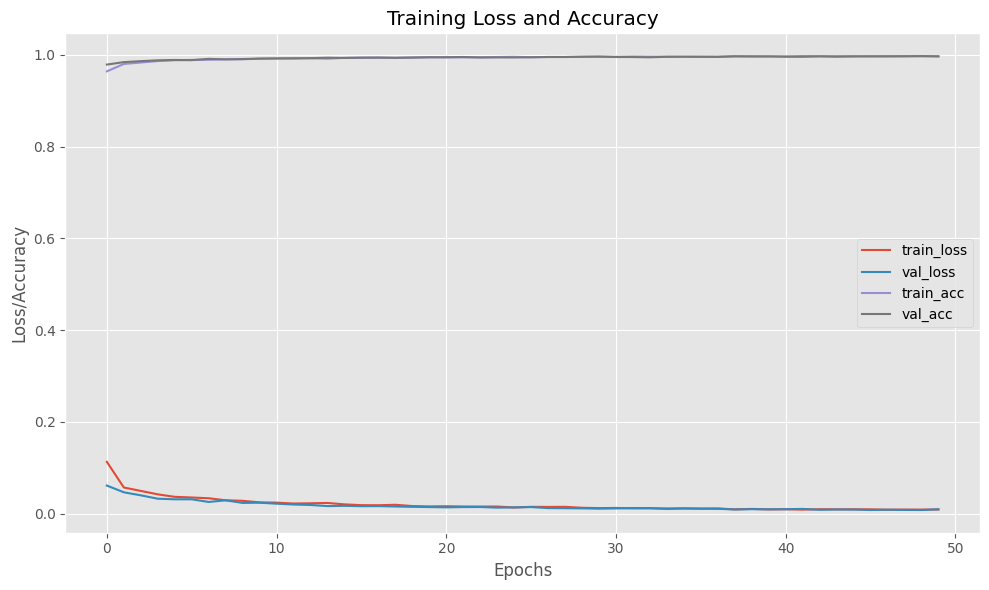

[INFO] Model saved successfully


In [16]:
# Evaluate the model
print("[INFO] Evaluating network...")

# Reset the validation generator at the beginning
validation_generator.reset()

# Get true labels
y_true = validation_generator.classes

# Predict with the model
y_pred = model.predict(
    validation_generator,
    steps=np.ceil(validation_generator.samples / BS)
)
y_pred = np.argmax(y_pred, axis=1)

# Only use predictions for the actual number of validation samples
y_true = y_true[:validation_generator.samples]
y_pred = y_pred[:validation_generator.samples]

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(
    y_true, 
    y_pred, 
    target_names=validation_generator.class_indices.keys()
))

# Plot training history
N = len(H.history["loss"])
plt.style.use("ggplot")
plt.figure(figsize=(10, 6))

plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Save the model
model.save("my_mask_detector_2class.h5")
print("[INFO] Model saved successfully")

In [13]:
# Function to create a simple test for the model
def test_model_on_image(model, image_path, target_size=(224, 224)):
    # Load and preprocess the image
    img = Image.open(image_path)
    img = img.convert('RGB')
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    
    # Make prediction
    preds = model.predict(img_array)
    pred_class = np.argmax(preds, axis=1)[0]
    pred_prob = preds[0][pred_class] * 100
    
    # Get class name
    class_names = list(validation_generator.class_indices.keys())
    pred_class_name = class_names[pred_class]
    
    print(f"Prediction: {pred_class_name} with confidence {pred_prob:.2f}%")
    
    # Display the image with prediction
    plt.figure(figsize=(8, 8))
    plt.imshow(Image.open(image_path))
    plt.title(f"Prediction: {pred_class_name} ({pred_prob:.2f}%)")
    plt.axis('off')
    plt.show()

# Test the model on a few images (uncomment to use)
# Replace these with actual paths to test images
# test_image_paths = [
#     '/path/to/test_image1.jpg',
#     '/path/to/test_image2.jpg'
# ]
# for img_path in test_image_paths:
#     test_model_on_image(model, img_path)